In [22]:
from importlib import reload
from src.GEFConstructor import CreateGEF

import matplotlib.pyplot as plt
import numpy as np

In [4]:
G = CreateGEF("Config/ClassicGEF+beta57+Weird.py")
G.RunGEF(100,t1=115)

dict_keys(['phi', 'dphi'])
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
Elapsed time: 159.9912 seconds
success: True


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.149e+02  1.150e+02]
        y: [[ 0.000e+00  9.999e-02 ...  7.218e+01  7.223e+01]
            [ 1.000e+00  1.005e+00 ...  8.364e+00  8.368e+00]
            ...
            [ 0.000e+00  4.822e+47 ...  1.389e+39  1.421e+39]
            [ 0.000e+00  7.770e+46 ...  2.044e+38  2.089e+38]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20420
     njev: 0
      nlu: 0

Already Unitful


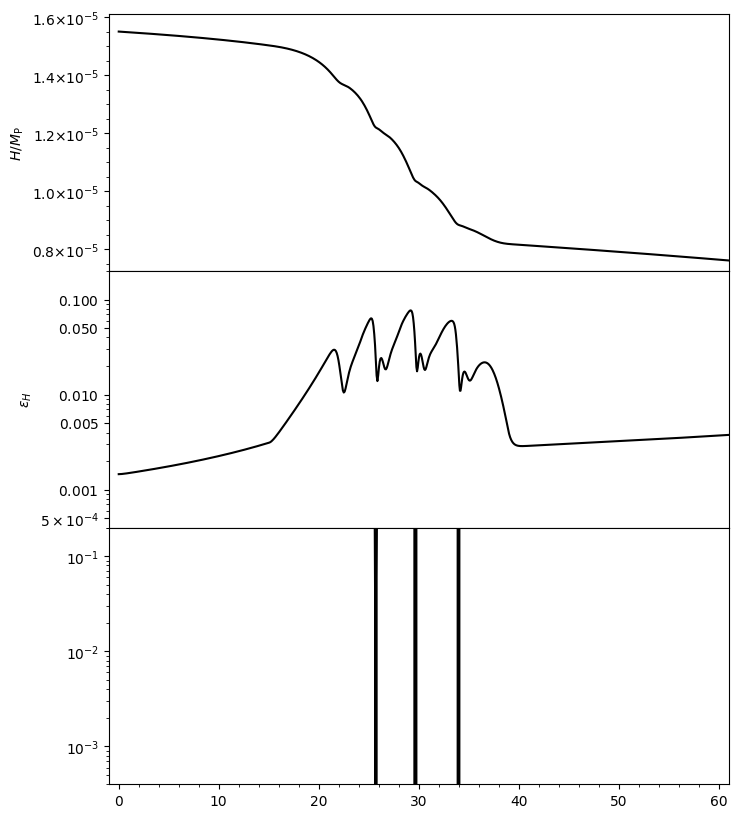

In [ ]:
G.Unitful()

epsH = -G.vals["Hprime"]/G.vals["H"]**2

fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,10))
ax[0].plot(G.vals["N"], G.vals["H"], "k")
ax[0].set_ylim(0.725e-5,1.61e-5)
yticks = np.round(np.arange(0.8, 1.61, 0.2),1)
ytickslab = [rf"${ytick}$" + r"$\times 10^{-5}$" for ytick in yticks]
ax[0].set_yticks(yticks*1e-5, ytickslab)
yticksmin = np.arange(0.75, 1.65, 0.05)
ax[0].set_yticks(yticksmin*1e-5, minor=True)
ax[0].set_ylabel(r"$H/M_{\rm P}$")

ax[1].plot(G.vals["N"], epsH, "k")
yticks = [5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
ytickslab = [r"$5 \times 10^{-4}$", r"$0.001$", r"$0.005$", r"$0.010$", r"$0.050$", r"$0.100$"]

ax[1].set_ylim(4e-4,0.2)
ax[1].set_yscale("log")
ax[1].set_yticks(yticks, ytickslab)
ax[1].set_ylabel(r"$\varepsilon_H$")

ax[2].plot(G.vals["N"], G.vals["xi"], "k")
ax[2].set_ylim(4e-4,0.2)
ax[2].set_yscale("log")

ax[2].set_xticks(np.arange(0, 70, 10))
ax[2].set_xticks(np.arange(0, 70, 2), minor=True)
ax[2].set_xlim(-1, 61)
plt.subplots_adjust(hspace=0)
plt.show()